# Data Clustering

Up until now, we know how to evaluate the central tendencies of 1-dimensional data.

If the data is multi-dimensional, what is the central tendency?

Topics:
+ What is clustering? summarization of high dimensional data.
+ Kmeans - distance metric 
+ Data processing: categorical to numerical, standardization
+ Visualization of clusters
+ Evaluation of clusterings: inertia, silhouette, Rand index
+ The elbow method

Datasets: 
1. iris, 
2. Mall_Customers
3. wine (assignment)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas
iris = pandas.read_csv('../Datasets/iris.csv')

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from seaborn import displot, relplot
%matplotlib inline

In [22]:
# We create a model, which does the clustering for us.
# We want the model to cluster the data into 3 clusters.
model = KMeans(n_clusters=4)

# We define the features (sometimes, we call this "X").
# We will cluster 150 data points (iris.csv) using these two features
features = iris[['PetalWidth','PetalLength']]

# This does the clustering.
model.fit(features)

# These are the cluster labels (0, 1, 2)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

KMeans puts data into clusters.  Points in the same cluster are similar to each other in some way.

Points in the same cluster are more similar than points in different clusters.

Next we want to visualize how points are clusters.  One way to do this is to create a new column and then visualize the data, using this new column. We can use colors, rows, columns to separate these points with relplot.

In [23]:
iris['clusters'] = model.labels_
iris.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,clusters
40,5.0,3.5,1.3,0.3,setosa,1
51,6.4,3.2,4.5,1.5,versicolor,0
12,4.8,3.0,1.4,0.1,setosa,1
47,4.6,3.2,1.4,0.2,setosa,1
66,5.6,3.0,4.5,1.5,versicolor,0


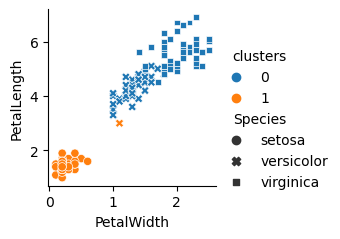

In [37]:
from seaborn import relplot, displot
relplot(data=iris, x='PetalWidth', y='PetalLength', hue='clusters', style='Species', height=2.5)

### Exercises

Objectives:
- Understand and apply the K-means clustering algorithm.
- Learn how to determine the optimal number of clusters using the elbow method.
- Gain practical experience in data preprocessing and exploratory data analysis.


1. Apply the K-means algorithm to cluster the customers based on the features "Annual Income" and "Spending Score" only. 
2. Visualize the clusters by plotting the customers' "Annual Income" against their "Spending Score" and color-coding the clusters.
3. Determine the optimal number of clusters.

---

In [25]:
#PID:9
#
# Task: cluster customers into 2 clusters (based on Annual Income and Spending)
#
import pandas
from sklearn.cluster import KMeans
import seaborn

customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
model = KMeans(n_clusters=2)
features = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
model.fit(features)

KMeans(n_clusters=2)

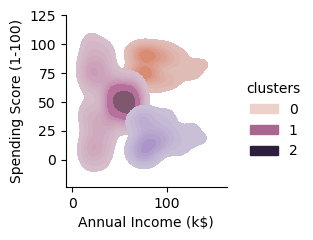

In [26]:
#PID:10
#
# Task: visualize the distribution of the clustered data points
#
import pandas
from sklearn.cluster import KMeans
import seaborn

# load data and define features
customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
features = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# create a model and do the clustering
model = KMeans(n_clusters=3)
model.fit(features)

# save the cluster labels
customers['clusters'] = model.labels_

# visualize the distribution of clustered data points, using the features
seaborn.displot(data=customers, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)',
                kind='kde',
                hue='clusters',
                fill=True,
                height=2.5,
               )

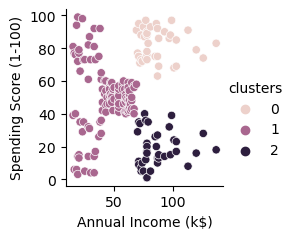

In [27]:
seaborn.relplot(data=customers, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)',
                hue='clusters',
                height=2.5,
               )

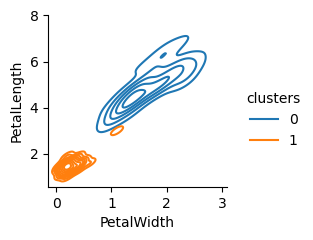

In [28]:
# We create a model, which does the clustering for us.
# We want the model to cluster the data into 3 clusters.

model = KMeans(n_clusters=2)
features = iris[['PetalWidth','PetalLength']]
model.fit(features)
iris['clusters'] = model.labels_
displot(data=iris, x='PetalWidth', y='PetalLength', kind='kde', hue='clusters', height=2.5)

In [29]:
model.inertia_

86.39021984551397

In [30]:
model.cluster_centers_

array([[1.68181818, 4.92525253],
       [0.2627451 , 1.49215686]])

In [31]:
features = iris[['PetalWidth','PetalLength']]
for k in range(2,20):
    model = KMeans(n_clusters=k)
    model.fit(features)
    print(k, round(model.inertia_,1))

2 86.4
3 31.4
4 19.5
5 13.9
6 11.1
7 9.2
8 7.7
9 6.6
10 5.6
11 5.2
12 4.8
13 4.3
14 4.0
15 3.6
16 3.4
17 3.1
18 2.9
19 2.6


In [32]:
#PID:11
#
# Task: determine the best number of clusters based on inertia
#
import pandas
from sklearn.cluster import KMeans
import seaborn

# load data and define features
customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
features = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# for each number of clusters k, cluster, and print out the inertia
last_inertia = 0
for k in range(2, 25):
    model = KMeans(n_clusters=k)
    model.fit(features)
    inertia = model.inertia_
    if k>2:
        delta = inertia - last_inertia
        print(k, round(inertia,1), delta)
    last_inertia = inertia

print('Based on this analysis, I think the best number of clusters is ___')

3 106348.4 -75015.22289748474
4 73679.8 -32668.584022622847
5 44448.5 -29231.333591554634
6 37265.9 -7182.59024309025
7 30227.6 -7038.258691691444
8 24986.5 -5241.080872509134
9 21818.1 -3168.4110521907023
10 19641.5 -2176.6583718006113
11 17509.0 -2132.4856392514957
12 15845.1 -1663.8533413365349
13 14292.5 -1552.5734126984134
14 13161.1 -1131.4349539102604
15 12237.8 -923.3074233164589
16 10753.5 -1484.2895413765
17 9902.7 -850.7721727984645
18 9103.2 -799.5463812817252
19 8728.0 -375.2115366985963
20 8283.5 -444.4880952380954
21 7723.2 -560.327468463619
22 7299.0 -424.16135805871727
23 6857.3 -441.666678557267
24 6365.5 -491.7997007851118
Based on this analysis, I think the best number of clusters is ___


In [33]:
model = KMeans(n_clusters=5)
model.fit(features)
customers['clusters'] = model.labels_

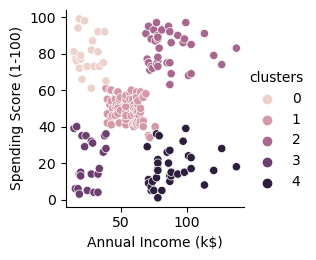

In [34]:
relplot(data=customers, 
        x='Annual Income (k$)', 
        y='Spending Score (1-100)', 
        hue='clusters', height=2.7) 

In [35]:
customers.groupby('clusters')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,
0,25.3,25.7,79.4
1,42.7,55.3,49.5
2,32.7,86.5,82.1
3,45.2,26.3,20.9
4,41.1,88.2,17.1


In [36]:
customers.describe().round(1).loc[['min','max']]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
min,1.0,18.0,15.0,1.0,0.0
max,200.0,70.0,137.0,99.0,4.0
